In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import cluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn import pipeline
from sklearn import decomposition
from scipy.spatial.distance import cdist, pdist
plt.rc('ps', useafm=True)
plt.rc('pdf', use14corefonts=True)

In [2]:
hourly = pd.read_csv('/home/shivar/Research/traffic/traffic_jams/data/segment-speeds-nairobi-hourly.csv', index_col=[0,1])

In [3]:
hourly.unstack(level=1)

speed_kph_mean                                              \
timestamp              0          1          2          3          4    
osm_way_id                                                              
4685092         69.582012  69.132915  69.232399  68.590678  68.938645   
4716859         32.752762  33.330925  33.559217  34.806410  34.687386   
4716860         32.780663  32.315736  32.403419  29.751220  35.797857   
4716861         28.709091  23.000000        NaN        NaN  23.566667   
4716862         51.318094  52.303889  52.530827  52.523752  53.486283   
...                   ...        ...        ...        ...        ...   
693712598             NaN        NaN        NaN        NaN        NaN   
693744691             NaN        NaN        NaN        NaN        NaN   
697156709       67.900000        NaN        NaN        NaN        NaN   
697156710       76.800000        NaN        NaN        NaN        NaN   
698498913       52.022549  53.193498  53.647925  53.853898  54.519361   

                                                                   ...  \
timestamp          5          6          7          8          9   ...   
osm_way_id                                                         ...   
4685092     69.808738  68.627399  68.008475  68.279391  68.541460  ...   
4716859     33.214917  30.069284  26.946832  25.391598  25.442424  ...   
4716860     39.884592  34.916186  35.047902  36.460249  37.703047  ...   
4716861     26.450000  27.318571  21.911217  21.395464  22.616813  ...   
4716862     51.805655  45.894766  38.515978  36.006887  36.235124  ...   
...               ...        ...        ...        ...        ...  ...   
693712598         NaN        NaN  40.133333  32.068852  44.251064  ...   
693744691         NaN        NaN        NaN        NaN  10.400000  ...   
697156709         NaN        NaN        NaN        NaN        NaN  ...   
697156710         NaN        NaN        NaN        NaN        NaN  ...   
698498913   52.277021  43.175691  32.507851  32.969008  34.891047  ...   

           speed_kph_stddev                                              \
timestamp                14         15         16         17         18   
osm_way_id                                                                
4685092           11.824056  12.098091  12.386011  12.799671  11.932885   
4716859           14.375650  14.965772  14.226877  14.577800  15.067310   
4716860           11.781135  12.303882  12.352572  13.046761  12.525658   
4716861           19.499667  20.184285  21.371576  21.688762  21.718759   
4716862           16.770143  17.144358  18.114511  19.584545  19.048171   
...                     ...        ...        ...        ...        ...   
693712598         24.335584  22.583467  24.967148  28.139936  27.789093   
693744691               NaN  30.700000        NaN        NaN  47.100000   
697156709               NaN        NaN        NaN        NaN        NaN   
697156710               NaN        NaN        NaN        NaN        NaN   
698498913         12.555134  12.459078  13.043445  13.041088  12.974843   

                                                                   
timestamp          19         20         21         22         23  
osm_way_id                                                         
4685092     11.095078  10.886088  10.541207  10.021031  10.013824  
4716859     14.207079  14.166239  14.468870  14.863647  14.488920  
4716860     11.281262  10.897400  11.339933  11.285739  10.421397  
4716861     19.504355  20.007476  21.083576  21.736555  21.581474  
4716862     16.273001  14.814426  13.970258  13.840214  13.767161  
...               ...        ...        ...        ...        ...  
693712598   22.640303  25.152535  12.500000        NaN        NaN  
693744691         NaN        NaN        NaN        NaN        NaN  
697156709         NaN        NaN        NaN        NaN        NaN  
697156710         NaN        NaN        NaN        NaN        NaN  
698498913   12.5

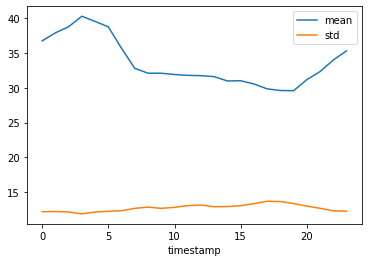

In [4]:
hourly_mean = hourly.speed_kph_mean.unstack(level=1)
hourly_std = hourly.speed_kph_stddev.unstack(level=1)
hourly_mean.mean().plot(label='mean')
hourly_std.mean().plot(label='std')
plt.legend()

Text(0.5, 1.0, 'Box plot of std dev of hourly speed across all segments')

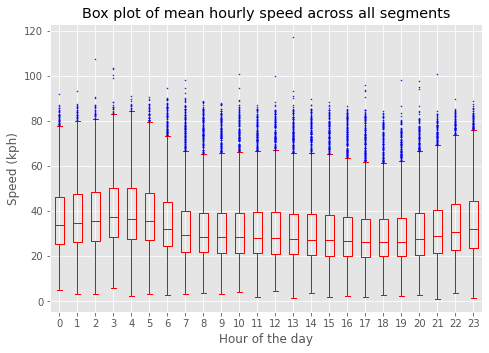

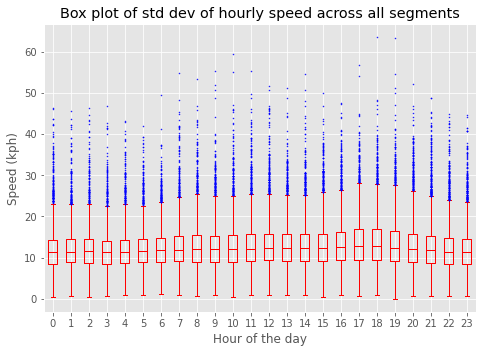

In [5]:
plt.style.use('ggplot')
flierprops = dict(marker='.', markerfacecolor='blue', markersize=1,
                  linestyle='none', markeredgecolor='blue')

fig1 = plt.figure()
ax1 = fig1.add_axes([0, 0, 1, 1])
bp1 = hourly_mean.boxplot(ax=ax1, flierprops=flierprops, return_type='dict')
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp1[item], color='red')
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Speed (kph)')
ax1.set_title('Box plot of mean hourly speed across all segments')

fig2 = plt.figure()
ax2 = fig2.add_axes([0, 0, 1, 1])
bp2 = hourly_std.boxplot(ax=ax2, flierprops=flierprops, return_type='dict')
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp2[item], color='red')
ax2.set_xlabel('Hour of the day')
ax2.set_ylabel('Speed (kph)')
ax2.set_title('Box plot of std dev of hourly speed across all segments')


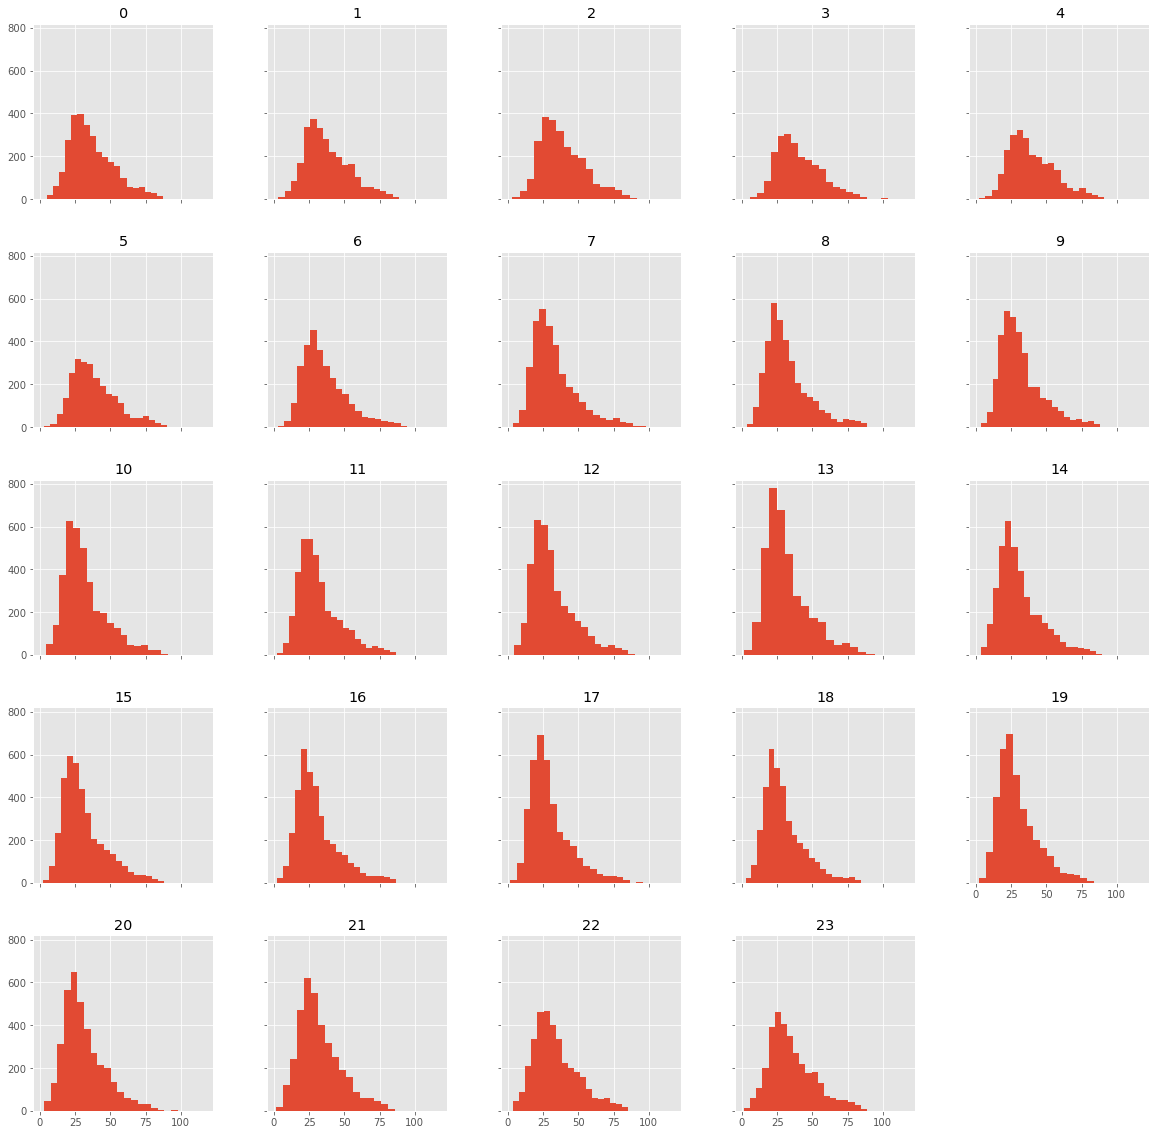

In [6]:
_ = hourly_mean.hist(figsize=(20,20), sharex=True, sharey=True, bins=20)

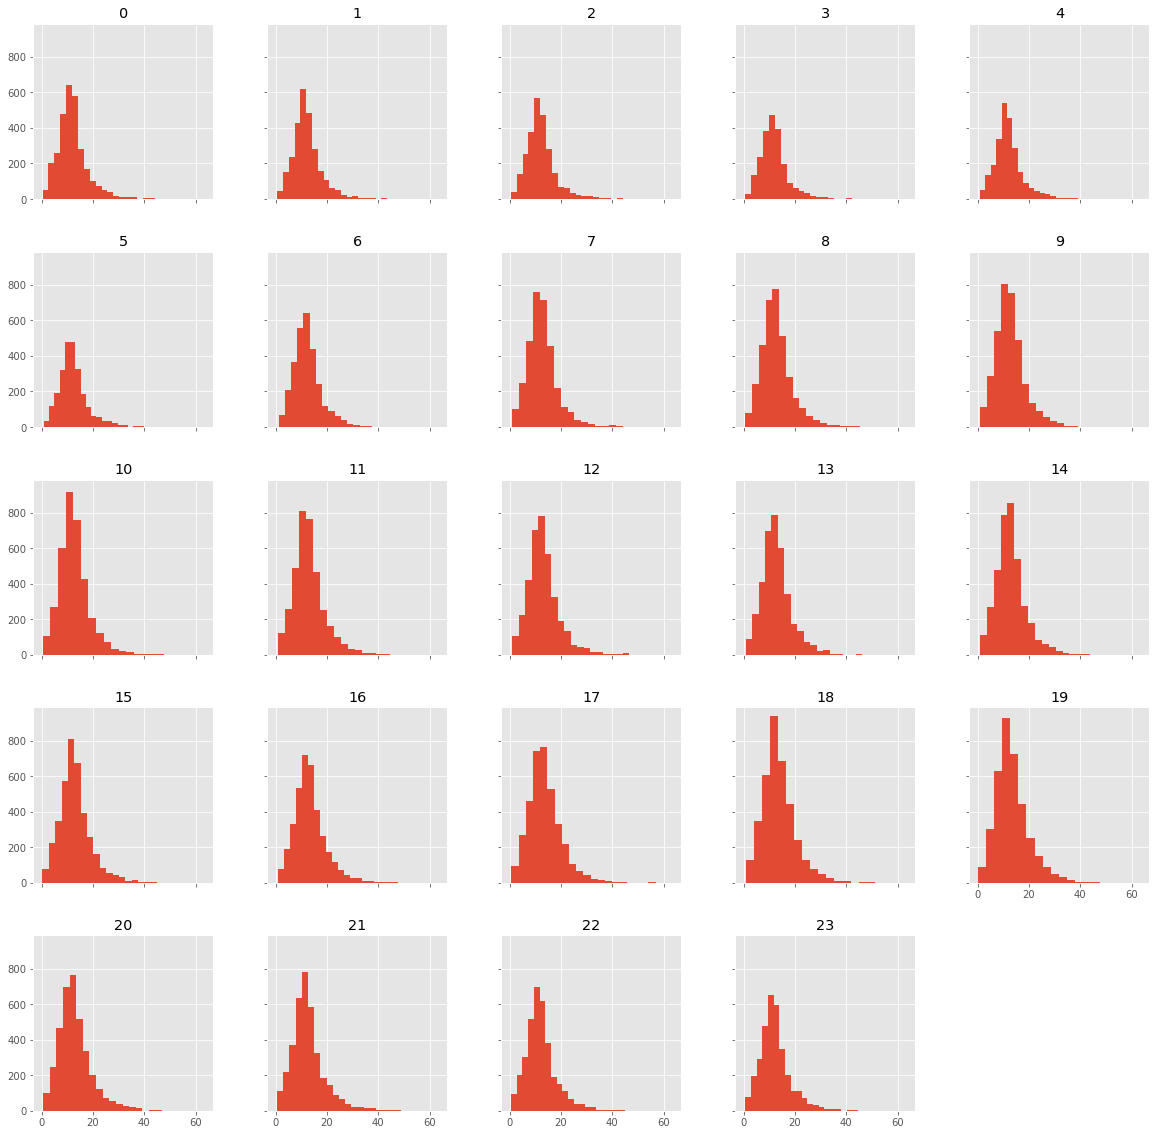

In [7]:
_ = hourly_std.hist(figsize=(20,20), sharex=True, sharey=True, bins=20)

In [9]:
# testing

# ONLY SELECT THOSE WAYIDS FOR WHICH DATA IS AVAILABLE AT ALL HOURS IN A DAY
X = hourly_mean.dropna()
#X = hourly.unstack(level=1).dropna()
print(X.shape)

#clist = list(mpl.colors.XKCD_COLORS.values())
clist = list(mpl.colors.BASE_COLORS.keys())

n_clusters = 3
rand_state = 0
scaler = preprocessing.MinMaxScaler()
pca = decomposition.PCA(random_state=rand_state)
pipe = pipeline.make_pipeline(scaler, pca)

# pipeline
Xt = pipe.fit_transform(X.values)
model = cluster.KMeans(n_clusters, algorithm='full', random_state=rand_state).fit(Xt)

print('Model params:', model.get_params())
print('Inertia:', model.inertia_)
print('Number of iterations:', model.n_iter_)

save_suffix = '-k{}-rand{}'.format(n_clusters, rand_state)

segments_clusters = pd.Series(model.labels_, index=X.index, name='cluster_label')
segments_clusters.to_csv('../../clustering/cluster_labels{}.csv'.format(save_suffix.replace('-', '_')))
closest, _ = metrics.pairwise_distances_argmin_min(model.cluster_centers_, Xt)

for jj in range(n_clusters):
    arr = segments_clusters.loc[segments_clusters == jj].sort_index()
    print('Cluster {}: (closest is {}) {}'.format(jj, X.index[closest[jj]], arr[:5].index.values))

(2005, 24)
Model params: {'algorithm': 'full', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 10, 'random_state': 0, 'tol': 0.0001, 'verbose': 0}
Inertia: 334.33980144756174
Number of iterations: 23
Cluster 0: (closest is 679837860) [4716859 4716873 4723375 4723967 4723976]
Cluster 1: (closest is 231493248) [4716860 4716862 4716887 4723371 4723377]
Cluster 2: (closest is 231493253) [ 4685092  4723986  4962952 24709502 24717220]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


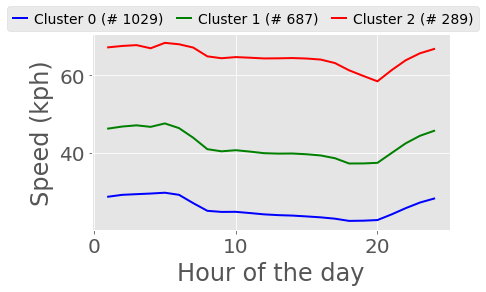

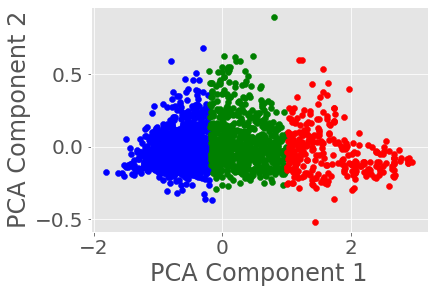

In [11]:
plt.rc('font', size=20)

fig = plt.figure(); ax = fig.add_subplot(111)
centroids_transformed = pipe.inverse_transform(model.cluster_centers_)
for ii, centroid in enumerate(centroids_transformed):
    ax.plot(np.arange(1, 25), centroid, c=clist[ii%len(clist)], lw=2, label='Cluster {} (# {})'.format(ii, (model.labels_==ii).sum()))
ax.set_xlabel('Hour of the day', labelpad=5)
ax.set_ylabel('Speed (kph)', labelpad=5)
fig.legend(loc='upper center', fontsize='x-small', ncol=3, handlelength=1, columnspacing=1, handletextpad=0.5)
fig.subplots_adjust(left=0.15, bottom=0.2, right=0.98)
np.savetxt('../../clustering/cluster_centroids{}.csv'.format(save_suffix.replace('-', '_')),
           centroids_transformed.T, delimiter=',', fmt='%.1f')
#fig.savefig('../../clustering/cluster-centroids{}.pdf'.format(save_suffix))
fig.savefig('../../clustering/cluster-centroids{}.eps'.format(save_suffix))

#X1 = X.values[:,:24].mean(axis=1); X2 = X.values[:,24:].mean(axis=1)
#X1 = np.quantile(X.values, 0.25, axis=1); X2 = np.quantile(X.values, 0.75, axis=1)
#X1 = np.quantile(X.values, 0.5, axis=1); X2 = X.values.mean(axis=1)
X1 = Xt[:,0]; X2 = Xt[:,1]
fig = plt.figure(); ax = fig.add_subplot(111)
for jj in range(n_clusters):
    ax.scatter(X1[model.labels_ == jj], X2[model.labels_ == jj], c=clist[jj%len(clist)])
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
fig.subplots_adjust(left=0.2, bottom=0.2, top=0.98, right=0.98)
#fig.savefig('../../clustering/cluster-scatter{}.pdf'.format(save_suffix))
fig.savefig('../../clustering/cluster-scatter{}.eps'.format(save_suffix))

plt.show()

(2005, 24)
Model params: {'algorithm': 'auto', 'cluster_method': 'xi', 'eps': None, 'leaf_size': 30, 'max_eps': inf, 'memory': None, 'metric': 'minkowski', 'metric_params': None, 'min_cluster_size': None, 'min_samples': 10, 'n_jobs': None, 'p': 2, 'predecessor_correction': True, 'xi': 0.05}
Cluster 0: [ 97676906  97988623 184369602 288107280 312485790]
Cluster 1: [ 97676908 184369593 184369594 184369603 184369607]


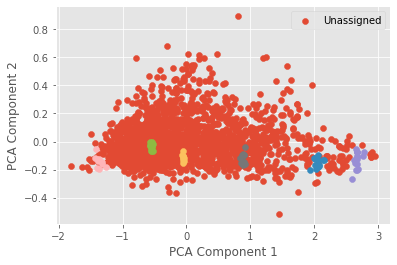

In [18]:
# testing

X = hourly_mean.dropna()
#X = hourly.unstack(level=1).dropna()
print(X.shape)

rand_state = 0
scaler = preprocessing.MinMaxScaler()
pca = decomposition.PCA(random_state=rand_state)
pipe = pipeline.make_pipeline(scaler, pca)

# pipeline
Xt = pipe.fit_transform(X.values)
model = cluster.OPTICS(min_samples=10).fit(Xt)

print('Model params:', model.get_params())
# print('Inertia:', model.inertia_)
# print('# iterations:', model.n_iter_)
segments_clusters = pd.Series(model.labels_, index=X.index, name='cluster_label')
for jj in range(n_clusters):
    arr = segments_clusters.loc[segments_clusters == jj].sort_index()
    print('Cluster {}: {}'.format(jj, arr[:5].index.values))

# fig = plt.figure(); ax = fig.add_subplot(111)
# centroids_transformed = pipe.inverse_transform(model.cluster_centers_)
# for ii, centroid in enumerate(centroids_transformed):
#     ax.plot(centroid, label='Cluster {} (# {})'.format(ii, (model.labels_==ii).sum()))
# plt.legend(loc=0)

#X1 = X.values[:,:24].mean(axis=1); X2 = X.values[:,24:].mean(axis=1)
#X1 = np.quantile(X.values, 0.25, axis=1); X2 = np.quantile(X.values, 0.75, axis=1)
#X1 = np.quantile(X.values, 0.5, axis=1); X2 = X.values.mean(axis=1)
X1 = Xt[:,0]; X2 = Xt[:,1]
fig = plt.figure(); ax = fig.add_subplot(111)
unique_labels = np.unique(model.labels_)
for jj in unique_labels:
    obj = ax.scatter(X1[model.labels_ == jj], X2[model.labels_ == jj])
    if (jj == -1):
        obj.set_label('Unassigned')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')

ax.legend(loc=0)    
plt.show()

In [14]:
model.labels_

array([-1, 19, -1, ..., -1, -1, -1])

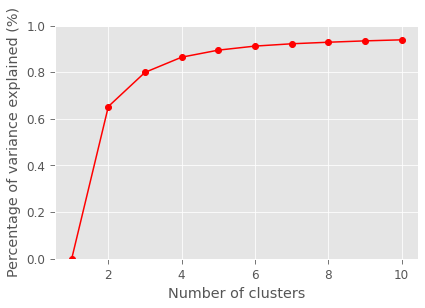

In [97]:
plt.rc('font', size=12)

def elbow(X, n):
    scaler = preprocessing.MinMaxScaler()
    Xt = scaler.fit_transform(X.values)
    kMeansVar = [cluster.KMeans(n_clusters=k).fit(Xt) for k in range(1, n)]
    centroids = [model.cluster_centers_ for model in kMeansVar]
    #centroids_transformed = [pipe.inverse_transform(model.cluster_centers_) for model in kMeansVar]
    k_euclid = [cdist(Xt, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(Xt)**2)/Xt.shape[0]
    bss = (tss - wcss)/tss
    x_vals = list(range(1,1+len(bss)))
    return x_vals, bss

#X = hourly.unstack(level=1).dropna()
#X = hourly_mean.dropna()

#x_vals, bss = elbow(X, 11)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_vals, bss, color='red', marker="o")
ax.grid(True)
#plt.title('Elbow for KMeans Clustering')
ax.set_xlabel('Number of clusters', labelpad=5)
ax.set_ylabel('Percentage of variance explained (%)', labelpad=5)
ax.set_ylim(0,1)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(which='major', pad=5, length=5)
fig.subplots_adjust(left=0.12, bottom=0.15, top=0.96, right=0.96)
fig.savefig('elbow.pdf')
plt.show()

In [43]:
datadir = '/home/shivar/Research/traffic/traffic_jams/data/per-segment/'
speeds_raw_seg = pd.read_csv(datadir + '4685092.csv', 
                             usecols=[1,2], index_col=[0], parse_dates=True)
speeds_raw_seg

,speed_kph_mean
utc_timestamp,
2018-01-01 00:00:00+00:00,74.8200
2018-01-01 02:00:00+00:00,73.6970
2018-01-01 04:00:00+00:00,65.7865
2018-01-01 05:00:00+00:00,73.6325
2018-01-01 06:00:00+00:00,69.1085
...,...
2019-12-31 19:00:00+00:00,68.7800
2019-12-31 20:00:00+00:00,66.8675
2019-12-31 21:00:00+00:00,70.3765


In [44]:
speeds_raw_seg['hour'] = speeds_raw_seg.index.hour
speeds_raw_seg['day'] = speeds_raw_seg.index.date
speeds_raw_seg

,speed_kph_mean,hour,day
utc_timestamp,,,
2018-01-01 00:00:00+00:00,74.8200,0,2018-01-01
2018-01-01 02:00:00+00:00,73.6970,2,2018-01-01
2018-01-01 04:00:00+00:00,65.7865,4,2018-01-01
2018-01-01 05:00:00+00:00,73.6325,5,2018-01-01
2018-01-01 06:00:00+00:00,69.1085,6,2018-01-01
...,...,...,...
2019-12-31 19:00:00+00:00,68.7800,19,2019-12-31
2019-12-31 20:00:00+00:00,66.8675,20,2019-12-31
2019-12-31 21:00:00+00:00,70.3765,21,2019-12-31


In [45]:
speeds_raw_seg.set_index(['day', 'hour'], inplace=True, drop=True)
speeds_raw_seg

speed_kph_mean
day        hour                
2018-01-01 0            74.8200
           2            73.6970
           4            65.7865
           5            73.6325
           6            69.1085
...                         ...
2019-12-31 19           68.7800
           20           66.8675
           21           70.3765
           22           70.0450
           23           72.0590

[15904 rows x 1 columns]

In [46]:
speeds_raw_seg.speed_kph_mean.unstack(level=1)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
2018-01-01,74.8200,NaN,73.6970,NaN,65.7865,73.6325,69.1085,76.3980,69.1395,69.6720,...,76.1445,74.2045,71.1690,75.5345,72.5265,69.7210,73.1800,73.5135,75.3430,72.5590
2018-01-02,74.2785,NaN,68.4225,NaN,79.8125,73.4460,76.7945,67.8405,72.2035,73.9560,...,61.2035,62.9985,65.0065,66.1465,64.2545,69.5275,69.6080,70.2665,72.0565,72.5755
2018-01-03,69.6745,NaN,71.5875,NaN,75.0860,69.2305,73.2875,67.3785,71.6530,71.7795,...,70.1090,70.3165,64.7800,69.2720,63.3345,69.8365,66.0805,71.2275,68.3515,72.7440
2018-01-04,71.5345,NaN,73.3470,NaN,59.8165,70.8270,69.3165,67.1230,72.3465,70.7745,...,67.6910,71.1880,66.1295,57.2150,68.2025,72.0045,68.0330,74.3635,72.8710,66.6835
2018-01-05,73.0575,NaN,NaN,NaN,NaN,68.1405,71.6700,64.3565,67.1005,69.2850,...,74.7400,72.8660,70.2070,67.0165,69.5070,72.7440,69.4480,74.9295,68.3705,72.3875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,69.6545,72.4595,65.0330,NaN,NaN,71.4485,72.1435,72.3455,72.5480,73.5855,...,70.4565,69.8105,67.0780,67.2275,64.4910,67.2025,68.3535,69.8310,71.5205,69.4970
2019-12-28,66.3420,69.4725,66.3695,NaN,NaN,69.6340,75.2255,73.1000,67.0225,70.1935,...,71.0590,71.3145,71.9645,71.5270,72.3745,67.8370,68.3510,71.1220,70.3560,68.3430
2019-12-29,68.8645,68.6175,70.2955,NaN,72.8145,71.5065,70.1200,71.4270,71.8960,73.9750,...,70.3625,72.7105,71.8170,72.8340,72.5215,68.0725,69.0945,70.2425,70.8225,69.6190


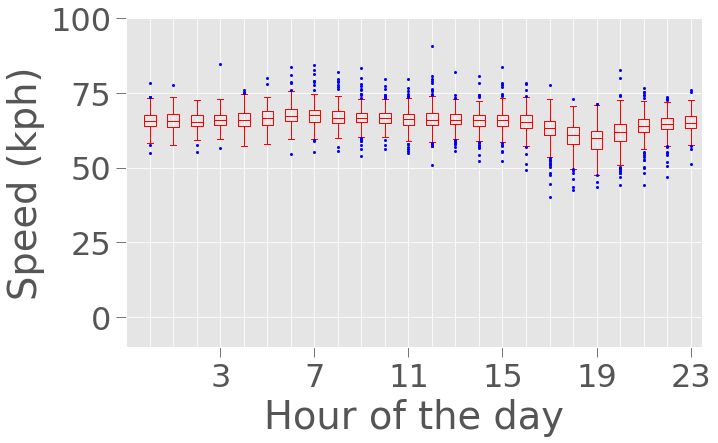

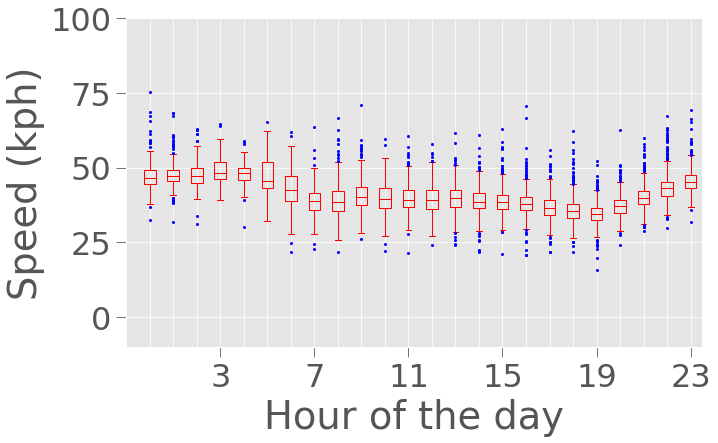

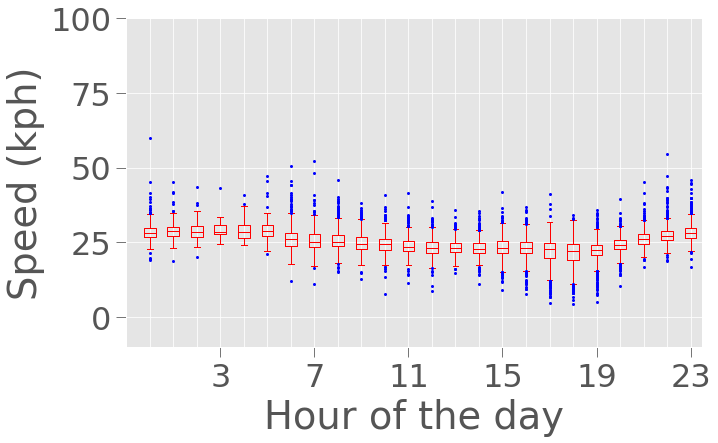

In [101]:
# address_dict = { 321619722 : 'Kasarani Mwiki Road',
#                  4962952 : 'Airport Road South ',
#                  321619710 : 'Thika Road ',
#                  529987013 : 'Lenana Road ',
#                  678652462 :'C63' }

address_k3_dict = { 231493253 : 'Thika Road / Eastern Bypass',
                    231493248 : 'Eastern Bypass',
                    679837860 : 'State House Road'}

flierprops = dict(marker='.', markerfacecolor='blue', markersize=4,
                  linestyle='none', markeredgecolor='blue', linewidth=2)


plt.rc('font', size=32)

xticks = np.arange(24)

def plot_box(wayid):
    
    speeds_raw_seg = pd.read_csv(datadir + '{}.csv'.format(wayid), 
                                 usecols=[1,2], index_col=[0], parse_dates=True)
    speeds_raw_seg['hour'] = speeds_raw_seg.index.hour
    speeds_raw_seg['day'] = speeds_raw_seg.index.date
    speeds_raw_seg.set_index(['day', 'hour'], inplace=True, drop=True)
    speeds_raw_seg = speeds_raw_seg.speed_kph_mean.unstack(level=1)
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    bp = speeds_raw_seg.boxplot(ax=ax, flierprops=flierprops, return_type='dict')
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color='r')
    ax.set_ylim(-10, 100)
    ax.set_xlabel('Hour of the day',labelpad=5)
    ax.set_ylabel('Speed (kph)', labelpad=5)
    #ax.set_title(address_k3_dict[wayid])
    ax.set_xticks(xticks, minor=True)
    ax.tick_params(axis='x', which='minor', bottom=0, top=0, labelbottom=0, labeltop=0)
    ax.set_xticks(np.arange(4, 25, 4))
    ax.tick_params(which='major', pad=5, length=10)
    ax.grid(True, 'minor')
    fig.subplots_adjust(left=0.16, bottom=0.2, top=0.96, right=0.96)
    fig.savefig('boxplot-{}.pdf'.format(wayid))
    plt.show()

for wayid in address_k3_dict.keys():
    plot_box(wayid)